# Caltech Machine Learning Homework # 4

In [2]:
import numpy as np
from sklearn.linear_model import Perceptron
import random
import math
import matplotlib.pyplot as plt
from typing import List
from itertools import product
import scipy.special
from scipy import optimize
import scipy.optimize as spo

Instructions: https://work.caltech.edu/homework/hw4.pdf

Answers: http://work.caltech.edu/homework/hw4_sol.pdf

## Generalization Error

![](imgs/genererr1.png)

Plugging the given numbers into the VC Inequality on WolframAlpha gives the following numerical approximation:

![](imgs/generrsol1.png)

So it looks like (d) is closest.

![](imgs/genererr2.png)

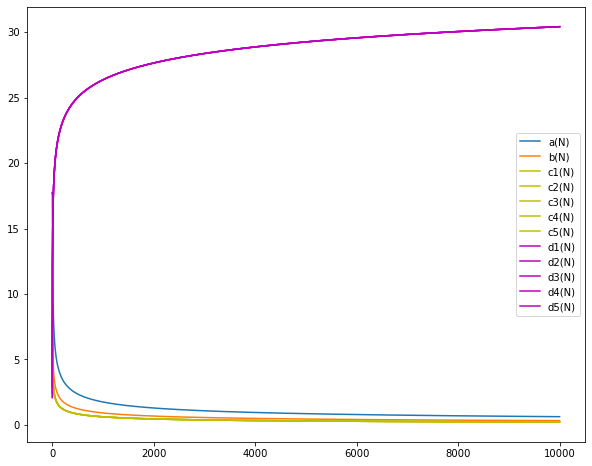

In [4]:
d_vc = 50
delta = 0.05

N = np.arange(1, 10000, 0.5, dtype=np.float128)

def a(N):
    m_H = (2*N)**d_vc # Approximate bound for growth function
    return math.sqrt( (8 / N) * np.log( (4*m_H) / delta ) )
  
def b(N):
    m_H = N**d_vc # Approximate bound for growth function
    return math.sqrt( (2 * np.log(float(2*N*m_H)) / N ) ) + math.sqrt( (2/N) * np.log(1/delta + 1/N) )
   
# How do we deal with the implicit epsilon?
# Let's looks at a few extreme values of epsilon?
e_min = 0
e_small = 0.01
e = 0.5
e_large = 0.99
e_max = 1
              
def c1(N):
    m_H = (2*N)**d_vc # Approximate bound for growth function
    return math.sqrt( (1 / N) * ( 2 * e_min + np.log( (6*m_H) / delta ) ) )              
def c2(N):
    m_H = (2*N)**d_vc # Approximate bound for growth function
    return math.sqrt( (1 / N) * ( 2 * e_small + np.log( (6*m_H) / delta ) ) )
def c3(N):
    m_H = (2*N)**d_vc # Approximate bound for growth function
    return math.sqrt( (1 / N) * ( 2 * e + np.log( (6*m_H) / delta ) ) )
def c4(N):
    m_H = (2*N)**d_vc # Approximate bound for growth function
    return math.sqrt( (1 / N) * ( 2 * e_large + np.log( (6*m_H) / delta ) ) )
def c5(N):
    m_H = (2*N)**d_vc # Approximate bound for growth function
    return math.sqrt( (1 / N) * ( 2 * e_max + np.log( (6*m_H) / delta ) ) )
    
def d1(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * (4*e_min*(1+e_min)) + np.log( (4*m_H) / delta ) )
def d2(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * (4*e_small*(1+e_small)) + np.log( (4*m_H) / delta ) )
def d3(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * (4*e*(1+e)) + np.log( (4*m_H) / delta ) )
def d4(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * (4*e_large*(1+e_large)) + np.log( (4*m_H) / delta ) )
def d5(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * (4*e_max*(1+e_max)) + np.log( (4*m_H) / delta ) )


plt.figure(figsize=(10, 8))    
plt.plot(N, np.vectorize(a)(N), label='a(N)')
plt.plot(N, np.vectorize(b)(N), label='b(N)')
plt.plot(N, np.vectorize(c1)(N), label='c1(N)', color='y')
plt.plot(N, np.vectorize(c2)(N), label='c2(N)', color='y')
plt.plot(N, np.vectorize(c3)(N), label='c3(N)', color='y')
plt.plot(N, np.vectorize(c4)(N), label='c4(N)', color='y')
plt.plot(N, np.vectorize(c5)(N), label='c5(N)', color='y')
plt.plot(N, np.vectorize(d1)(N), label='d1(N)', color='m')
plt.plot(N, np.vectorize(d2)(N), label='d2(N)', color='m')
plt.plot(N, np.vectorize(d3)(N), label='d3(N)', color='m')
plt.plot(N, np.vectorize(d4)(N), label='d4(N)', color='m')
plt.plot(N, np.vectorize(d5)(N), label='d5(N)', color='m')
plt.legend()
plt.show()


We can clearly exclude (d) from this, will should allow us to get a closer look at the remaining options

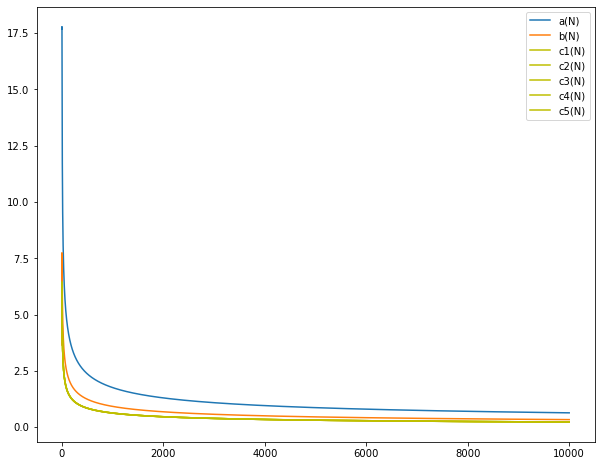

In [5]:
plt.figure(figsize=(10, 8))    
plt.plot(N, np.vectorize(a)(N), label='a(N)')
plt.plot(N, np.vectorize(b)(N), label='b(N)')
plt.plot(N, np.vectorize(c1)(N), label='c1(N)', color='y')
plt.plot(N, np.vectorize(c2)(N), label='c2(N)', color='y')
plt.plot(N, np.vectorize(c3)(N), label='c3(N)', color='y')
plt.plot(N, np.vectorize(c4)(N), label='c4(N)', color='y')
plt.plot(N, np.vectorize(c5)(N), label='c5(N)', color='y')
plt.legend()
plt.show()

Let's zoom in around the N=10,000 mark that we're interested in

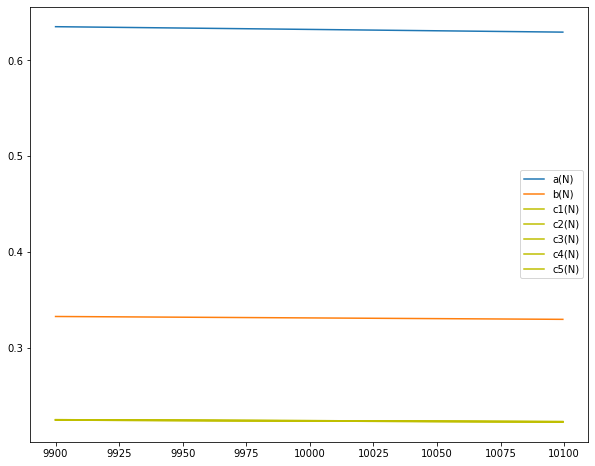

In [6]:
N = np.arange(9900, 10100, 0.5)

plt.figure(figsize=(10, 8))    
plt.plot(N, np.vectorize(a)(N), label='a(N)')
plt.plot(N, np.vectorize(b)(N), label='b(N)')
plt.plot(N, np.vectorize(c1)(N), label='c1(N)', color='y')
plt.plot(N, np.vectorize(c2)(N), label='c2(N)', color='y')
plt.plot(N, np.vectorize(c3)(N), label='c3(N)', color='y')
plt.plot(N, np.vectorize(c4)(N), label='c4(N)', color='y')
plt.plot(N, np.vectorize(c5)(N), label='c5(N)', color='y')
plt.legend()
plt.show()


Aaaaand the winner is (c)

Except I'm wrong again =)

Ah, I just had some wrong parentheses for the Devroye bound, let's do that again :)

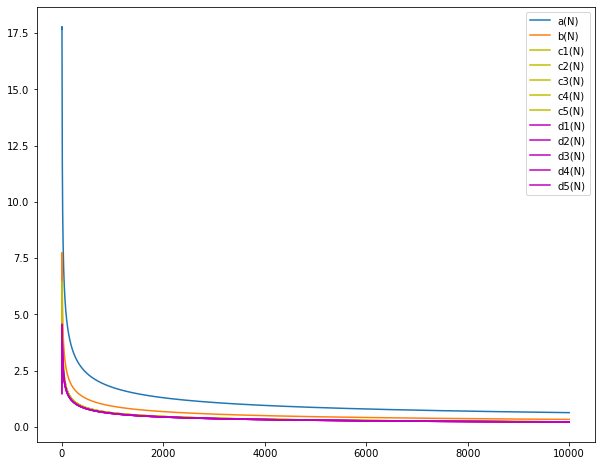

In [7]:
N = np.arange(1, 10000, 0.5, dtype=np.float128)

def d1(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * ( 4*e_min*(1+e_min) + np.log( (4*m_H) / delta ) ) )
def d2(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * ( 4*e_min*(1+e_small) + np.log( (4*m_H) / delta ) ) )
def d3(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * ( 4*e*(1+e) + np.log( (4*m_H) / delta ) ) )
def d4(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * ( 4*e_large*(1+e_large) + np.log( (4*m_H) / delta ) ) )
def d5(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * ( 4*e_large*(1+e_large) + np.log( (4*m_H) / delta ) ) )

plt.figure(figsize=(10, 8))    
plt.plot(N, np.vectorize(a)(N), label='a(N)')
plt.plot(N, np.vectorize(b)(N), label='b(N)')
plt.plot(N, np.vectorize(c1)(N), label='c1(N)', color='y')
plt.plot(N, np.vectorize(c2)(N), label='c2(N)', color='y')
plt.plot(N, np.vectorize(c3)(N), label='c3(N)', color='y')
plt.plot(N, np.vectorize(c4)(N), label='c4(N)', color='y')
plt.plot(N, np.vectorize(c5)(N), label='c5(N)', color='y')
plt.plot(N, np.vectorize(d1)(N), label='d1(N)', color='m')
plt.plot(N, np.vectorize(d2)(N), label='d2(N)', color='m')
plt.plot(N, np.vectorize(d3)(N), label='d3(N)', color='m')
plt.plot(N, np.vectorize(d4)(N), label='d4(N)', color='m')
plt.plot(N, np.vectorize(d5)(N), label='d5(N)', color='m')
plt.legend()
plt.show()

Now we can exclude (a) and zoom in

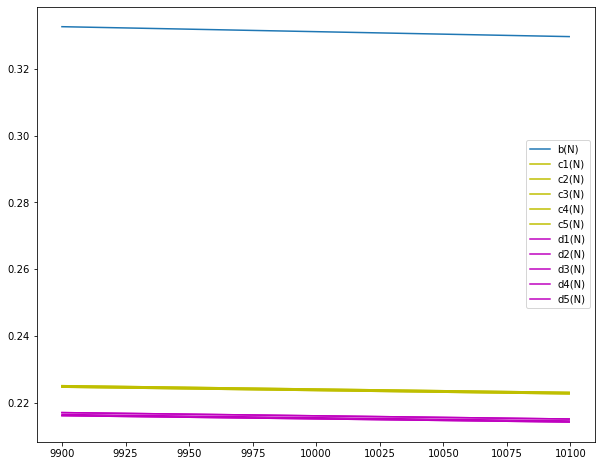

In [8]:
N = np.arange(9900, 10100, 0.5, dtype=np.float128)

plt.figure(figsize=(10, 8))    
plt.plot(N, np.vectorize(b)(N), label='b(N)')
plt.plot(N, np.vectorize(c1)(N), label='c1(N)', color='y')
plt.plot(N, np.vectorize(c2)(N), label='c2(N)', color='y')
plt.plot(N, np.vectorize(c3)(N), label='c3(N)', color='y')
plt.plot(N, np.vectorize(c4)(N), label='c4(N)', color='y')
plt.plot(N, np.vectorize(c5)(N), label='c5(N)', color='y')
plt.plot(N, np.vectorize(d1)(N), label='d1(N)', color='m')
plt.plot(N, np.vectorize(d2)(N), label='d2(N)', color='m')
plt.plot(N, np.vectorize(d3)(N), label='d3(N)', color='m')
plt.plot(N, np.vectorize(d4)(N), label='d4(N)', color='m')
plt.plot(N, np.vectorize(d5)(N), label='d5(N)', color='m')
plt.legend()
plt.show()

Aaaand the correct winner is (d) =)

I also learned from this notebook: https://nbviewer.jupyter.org/github/homefish/edX_Learning_From_Data_2017/blob/master/homework_4/homework_4_problem_2_plot_bounds.ipynb

...that instead of taking 5 "representative" values for epsilon in the implicit bounds (c) and (d), we could use a numerical solver, such as `scipy.optimize.brent`:

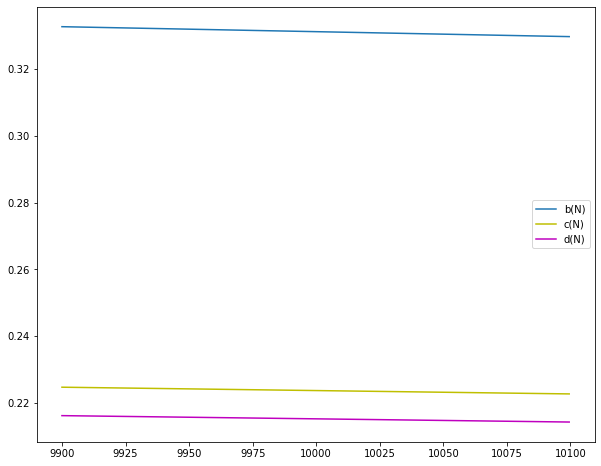

In [20]:
def c(N):
    m_H = (2*N)**d_vc # Approximate bound for growth function
    f = lambda e: math.sqrt( (1 / N) * ( 2 * e + np.log( (6*m_H) / delta ) ) ) - e
    return optimize.brentq(f, 0, 1)

def d(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    f = lambda e: np.sqrt( (1/(2*N)) * ( 4*e*(1+e) + np.log( (4*m_H) / delta ) ) ) - e
    return optimize.brentq(f, 0, 1)

N = np.arange(9900, 10100, 0.5, dtype=np.float128)

plt.figure(figsize=(10, 8))    
plt.plot(N, np.vectorize(b)(N), label='b(N)')
plt.plot(N, np.vectorize(c)(N), label='c(N)', color='y')
plt.plot(N, np.vectorize(d)(N), label='d(N)', color='m')
plt.legend()
plt.show()

Niiiiiiiiiiice

![](imgs/genererr3.png)



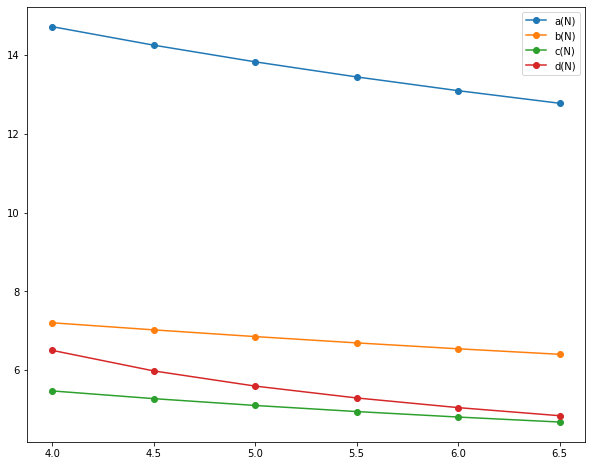

In [31]:
def c(N):
    m_H = (2*N)**d_vc # Approximate bound for growth function
    f = lambda e: math.sqrt( (1 / N) * ( 2 * e + np.log( (6*m_H) / delta ) ) ) - e
    return optimize.newton(f, 0.5) # Using newton here because the sign does not change in the interval given, which brentq requires

def d(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    f = lambda e: np.sqrt( (1/(2*N)) * ( 4*e*(1+e) + np.log( (4*m_H) / delta ) ) ) - e
    return optimize.newton(f, 0.5) # Using newton here because the sign does not change in the interval given, which brentq requires

N = np.arange(4, 7, 0.5, dtype=np.float128)


plt.figure(figsize=(10, 8))  
plt.plot(N, np.vectorize(a)(N), label='a(N)', marker='o')
plt.plot(N, np.vectorize(b)(N), label='b(N)', marker='o')
plt.plot(N, np.vectorize(c)(N), label='c(N)', marker='o')
plt.plot(N, np.vectorize(d)(N), label='d(N)', marker='o')
plt.legend()
plt.show()

Looks like the winner here is (c)

## Bias and Variance

![](imgs/bias1.png)

Not quite sure how to approach this theoretically, even though it seems like that should be simple, so let's actually build that algorithm!

Let's first look at a few examples of fitting `h(x) = ax` through two points picked at random, using least squares regression that passes through the origin:

In [3]:
def set_axis_cartesian():
    ax = plt.figure(figsize=(8, 8)).add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])

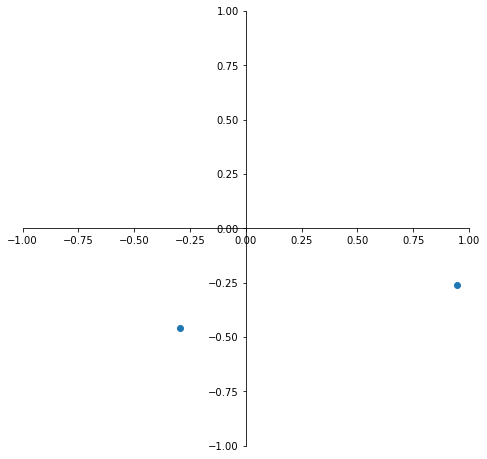

In [4]:
# Pick 2 random points
X = np.random.uniform(-1, 1, size=(2,2))
# Fit a linear regression that goes through the origin
xCoords = X[:,0]
yCoords = X[:,1]
a, SSR, _, _ = np.linalg.lstsq(xCoords[:,np.newaxis], yCoords, rcond=None)

set_axis_cartesian()

plt.plot(xCoords, yCoords, 'o')
plt.show()

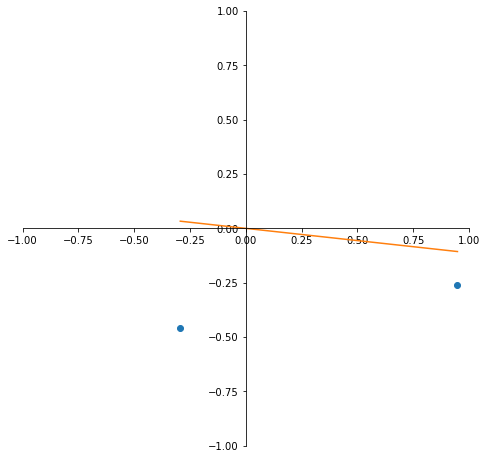

SSR is 0.26557244112055456


In [5]:
set_axis_cartesian()

plt.plot(xCoords, yCoords, 'o')
plt.plot(xCoords, a * xCoords, '-')
plt.show()
print(f"SSR is {SSR[0]}")

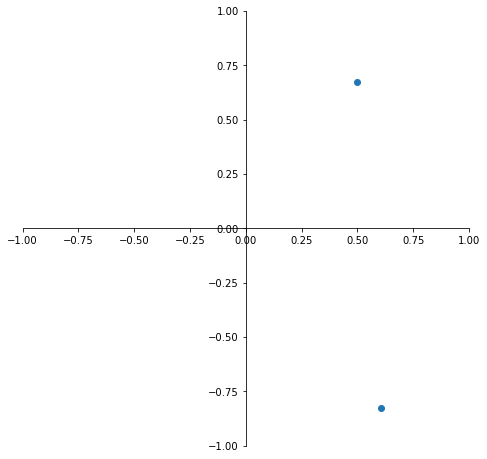

In [6]:
# Pick 2 random points
X = np.random.uniform(-1, 1, size=(2,2))
# Fit a linear regression that goes through the origin
xCoords = X[:,0]
yCoords = X[:,1]
a, SSR, _, _ = np.linalg.lstsq(xCoords[:,np.newaxis], yCoords, rcond=None)

set_axis_cartesian()

plt.plot(xCoords, yCoords, 'o')
plt.show()

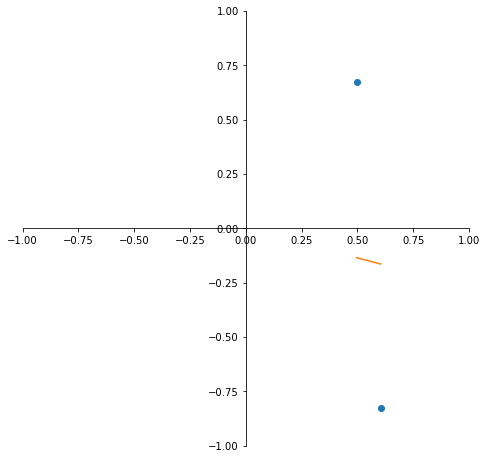

SSR is 1.093855628814754


In [7]:
set_axis_cartesian()

plt.plot(xCoords, yCoords, 'o')
plt.plot(xCoords, a * xCoords, '-')
plt.show()
print(f"SSR is {SSR[0]}")

How does SSR relate to MSE?

![](imgs/MSE.png)

In [9]:
MSE = (1/2) * ( (yCoords[0]-a*xCoords[0])**2 + (yCoords[1]-a*xCoords[1])**2  )
print(f"SSR is {SSR[0]}")
print(f"MSE is {MSE[0]}")
print(f"Twice the MSE is {2*MSE}")

SSR is 1.093855628814754
MSE is 0.546927814407377
Twice the MSE is [1.09385563]


So `MSE` is `SSR/N` or `SSR/2` in our case.

Okay, let's apply this to points coming from the actual training set (`f(x)=sin(πx)`), and repeat to get a numerical expected value

In [22]:
EXPERIMENTS = 1000000

aBars = []

for _ in range(EXPERIMENTS):
    # Pick 2 random points from the target function
    xCoords = np.random.uniform(-1, 1, size=2)
    yCoords = np.sin(np.pi*xCoords)
    a, _, _, _ = np.linalg.lstsq(xCoords[:,np.newaxis], yCoords, rcond=None)
    aBars.append(a[0])
    
aBar = sum(aBars)/len(aBars)
print(f"Expected value for a_bar after {EXPERIMENTS} runs is {aBar}")

Expected value for a_bar after 1000000 runs is 1.426340350271317


Looks like that corresponds to none of the provided answers, so [e]?

Phew =)

![](imgs/bias2.png)

![](imgs/bias5.png)

The bias will be the total area between our predicted function `gBar(x)=aBar*x` and the actual sine curve `f(x) = sin(πx)`

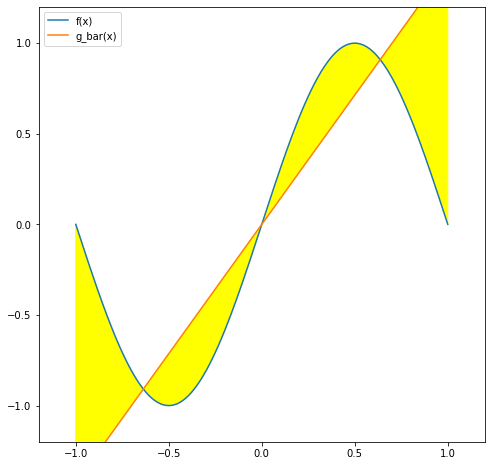

In [12]:
X = np.linspace(-1, 1, 200)

f = lambda x: np.sin(np.pi*x)
g_bar = lambda x: aBar*x

plt.figure(figsize=(8,8))
plt.plot(X, f(X), label="f(x)")
plt.plot(X, g_bar(X), label="g_bar(x)")
plt.xlim((-1.2, 1.2))
plt.ylim((-1.2, 1.2))
plt.fill_between(X, f(X), g_bar(X), color="yellow")
plt.legend()
plt.show()


So this should be the sum of 4 different integrals. Let's find the two non-zero intersection points (roots).

In [13]:
root1 = optimize.brentq(lambda x: f(x) - g_bar(x), -1, -0.5)
root3 = optimize.brentq(lambda x: f(x) - g_bar(x), 0.5, 1)
print(f"Root 1 is {root1}")
print(f"Root 3 is {root3}")

Root 1 is -0.6368070562897865
Root 3 is 0.6368070562897865


Now we can integrate, baby!

In [14]:
f_minus_gbar = lambda x: f(x) - g_bar(x)
gbar_minus_f = lambda x: g_bar(x) - f(x)

area1 = scipy.integrate.quad(f_minus_gbar, -1, root1)[0]
area2 = scipy.integrate.quad(gbar_minus_f, root1, 0)[0]
area3 = scipy.integrate.quad(f_minus_gbar, 0, root3)[0]
area4 = scipy.integrate.quad(gbar_minus_f, root3, 1)[0]

bias = area1 + area2 + area3 + area4

print(bias)

0.8002699617659952


**Answer**: This is closest to [d]

Aaand we're wrong again =) why?

Okay so, according to https://nbviewer.jupyter.org/github/homefish/edX_Learning_From_Data_2017/blob/master/homework_4/homework_4_problem_4_5_6_Bias_and_Variance.ipynb, I'm using the wrong (too simple) definition of bias.

Turns out, from slide 9 in Lecture 8,

![](imgs/bias6.png)

The mean of a function is defined as

![](imgs/bias7.png)

So in our case, with

```
a = -1
b = 1
f(x) = (g_bar - f) ** 2
```

We don't have to take separate integrals and instead directly get

$$\frac{1}{2} \ \int _{-1}^{1}(\overline{g}( x) \ -\ f( x))^{2}$$

In [19]:
correctBias = 0.5 * scipy.integrate.quad(lambda x: (g_bar(x) - f(x)) ** 2, -1, 1)[0]
correctBias

0.2704824780037454

Which correctly indicates answer [b]

![](imgs/bias3.png)

Let's first see if I can correctly calculate the bias and variance for the simple example given in Lecture 8.

We had the same `f(x) = sin(pi * x)`, `N=2` and we had

![](imgs/bias8.png)

![](imgs/bias9.png)

Bias should be

In [21]:
g_bar = lambda x: 0

bias = 0.5 * scipy.integrate.quad(lambda x: (g_bar(x) - f(x)) ** 2, -1, 1)[0]
bias

0.5

On to the variance!

![](imgs/variance1.png)

I'm not sure how to approximate g(d)(x) algebraically, so let's have some numeric fun again:

In [26]:
EXPERIMENTS_D = 10000

varianceEstimates = []

for _ in range(EXPERIMENTS_D):
    # Pick 2 random points from the target function
    xCoords = np.random.uniform(-1, 1, size=2)
    yCoords = np.sin(np.pi*xCoords)
    
    # The "best" approximation for b here should be the arithmetic mean of the y-coords
    b = (yCoords[0] + yCoords[1]) / 2
    g = lambda x: b
    
    # For each g(x) found (constant in this case), we need to estimate the average (g(x) - g_bar(x))**2
    varianceEstimate = (g(_) - g_bar(b))**2
    varianceEstimates.append(varianceEstimate)
    
varianceEstimate = sum(varianceEstimates)/len(varianceEstimates)
print(f"Expected value for variance after {EXPERIMENTS} runs is {varianceEstimate}")

Expected value for variance after 1000000 runs is 0.24882891218369055


That looks about right :) let's apply this to the actual problem 6 then!

`g(x)` is no longer constant, so we need to estimate different values of `x` for each dataset as well!

In [37]:
EXPERIMENTS_D = 1000
EXPERIMENTS_X = 100
print(g_bar(1))

varianceEstimates = []

for _ in range(EXPERIMENTS_D):
    # Pick 2 random points from the target function
    xCoords = np.random.uniform(-1, 1, size=2)
    yCoords = np.sin(np.pi*xCoords)
    
    a, _, _, _ = np.linalg.lstsq(xCoords[:,np.newaxis], yCoords, rcond=None)
    g = lambda x: a[0] * x
    
    # For each g(x) found, we need to estimate the average (g(x) - g_bar(x))**2
    avgsOverX = []
    for _ in range(EXPERIMENTS_X):
        # Pick a random x in [-1,1]
        x = np.random.uniform(-1, 1)
        avgOverX = (g(x) - g_bar(x)) ** 2
        avgsOverX.append(avgOverX)
        
    varianceEstimate = sum(avgsOverX)/len(avgsOverX)
    varianceEstimates.append(varianceEstimate)
    
varianceEstimate = sum(varianceEstimates)/len(varianceEstimates)
print(f"Expected value for variance after {EXPERIMENTS_D} runs for D and {EXPERIMENTS_X} runs for x is {varianceEstimate}")

0
Expected value for variance after 1000 runs for D and 100 runs for x is 0.8987590484805591


That would be closest to [e], unless I forgot to divide by N or something

Wrong again. Chwwwyyyyy?

Oh, notebook mutability problem. -.- I redefined `g_bar` as 0 somewhere after problem 4. Let's fix that

In [39]:
EXPERIMENTS_D = 1000
EXPERIMENTS_X = 100

g_bar: lambda x: aBar * x

varianceEstimates = []

for _ in range(EXPERIMENTS_D):
    # Pick 2 random points from the target function
    xCoords = np.random.uniform(-1, 1, size=2)
    yCoords = np.sin(np.pi*xCoords)
    
    a, _, _, _ = np.linalg.lstsq(xCoords[:,np.newaxis], yCoords, rcond=None)
    g = lambda x: a[0] * x
    
    # For each g(x) found, we need to estimate the average (g(x) - g_bar(x))**2
    avgsOverX = []
    for _ in range(EXPERIMENTS_X):
        # Pick a random x in [-1,1]
        x = np.random.uniform(-1, 1)
        avgOverX = (g(x) - g_bar(x)) ** 2
        avgsOverX.append(avgOverX)
        
    varianceEstimate = sum(avgsOverX)/len(avgsOverX)
    varianceEstimates.append(varianceEstimate)
    
varianceEstimate = sum(varianceEstimates)/len(varianceEstimates)
print(f"Expected value for variance after {EXPERIMENTS_D} runs for D and {EXPERIMENTS_X} runs for x is {varianceEstimate}")

Expected value for variance after 1000 runs for D and 100 runs for x is 0.916624122090183


Hmm, still wrong.
Here's a correct looking solution from https://nbviewer.jupyter.org/github/homefish/edX_Learning_From_Data_2017/blob/master/homework_4/homework_4_problem_4_5_6_Bias_and_Variance.ipynb

In [71]:
def problem6():
    a_avg = aBar
    expectation_over_X = 0
    
    RUNS_D = 100
    RUNS_X = 1
    # variance: Compare each g to g_bar
    
    for i in range(RUNS_X):
        N = 2
        x_test = np.random.uniform(-1,1)
        expectation_over_D = 0
        
        for _ in range(RUNS_D):
            # two random points as data set D
            x_rnd = np.random.uniform(-1, 1, N)
            y_rnd = np.sin(np.pi * x_rnd)

            # linear regression for model y = ax
            # get a particular g^(D)
            X_a = np.array([x_rnd]).T
            w_a = np.dot(np.dot(np.linalg.inv(np.dot(X_a.T, X_a)), X_a.T), y_rnd)
            a  = w_a[0]
            
            # calculate difference
            y_g = a * x_test
            y_g_bar = a_avg * x_test
            expectation_over_D += (y_g - y_g_bar)**2 / RUNS_D
        
        expectation_over_X += expectation_over_D / RUNS_X
    
    variance = expectation_over_X
    return variance


print("\nSolution to problem 6, variance = ", problem6())
print("Answer 6[a] is therefore correct.")


Solution to problem 6, variance =  0.23648530581190974
Answer 6[a] is therefore correct.


Hmm, maybe I took the expectation over D over the expectation over x, and the two are non-distributive?
Let's try again reversing the two loops

In [72]:
EXPERIMENTS_X = 1000
EXPERIMENTS_D = 100

g_bar: lambda x: aBar * x

varianceEstimates = []

for _ in range(EXPERIMENTS_X):
    # Pick a random x in [-1,1]
    x = np.random.uniform(-1, 1)
    avgsOverD = []    
    
    # For each x, we need to come up with a g(x) (based on D) and estimate the average (g(x) - g_bar(x))**2
    for _ in range(EXPERIMENTS_D):    
        # Pick 2 random points from the target function
        xCoords = np.random.uniform(-1, 1, size=2)
        yCoords = np.sin(np.pi*xCoords)

        a, _, _, _ = np.linalg.lstsq(xCoords[:,np.newaxis], yCoords, rcond=None)
        
        g = lambda x: a[0] * x 
        avgOverD = (g(x) - g_bar(x)) ** 2
        avgsOverD.append(avgOverD)
        
    varianceEstimate = sum(avgsOverD)/len(avgsOverD)
    varianceEstimates.append(varianceEstimate)
    
varianceEstimate = sum(varianceEstimates)/len(varianceEstimates)
print(f"Expected value for variance after {EXPERIMENTS_D} runs for D and {EXPERIMENTS_X} runs for x is {varianceEstimate}")

Expected value for variance after 1 runs for D and 1 runs for x is 0.002352752963143889


Still no dice, so that doesn't seem to make a difference.

Let's compare the two solutions on a single deterministic point, maybe my least squares approximation is off?

In [82]:
x = np.random.uniform(-1, 1)
xCoords = np.random.uniform(-1, 1, size=2)
yCoords = np.sin(np.pi*xCoords)

def homefishSolution():
    # linear regression for model y = ax
    # get a particular g^(D)
    X_a = np.array([xCoords]).T
    w_a = np.dot(np.dot(np.linalg.inv(np.dot(X_a.T, X_a)), X_a.T), yCoords)
    a  = w_a[0]
    return a
        
def mySolution():
    a, _, _, _ = np.linalg.lstsq(xCoords[:,np.newaxis], yCoords, rcond=None)
    return a[0]
        
print(homefishSolution())
print(mySolution())



1.0542450401778827
1.0542450401778827


Nope, also no diff here. What else did I mess up?

Ohhhhh ouch, python. It's a typo in the lambda I used in line 3 ;)

```
g_bar: lambda x: aBar * x
```
should be
```
g_bar = lambda x: aBar * x
```

In [94]:
EXPERIMENTS_X = 1000
EXPERIMENTS_D = 100

g_bar = lambda x: aBar * x

varianceEstimates = []

for _ in range(EXPERIMENTS_X):
    # Pick a random x in [-1,1]
    x = np.random.uniform(-1, 1)
    avgsOverD = []    
    
    # For each x, we need to come up with a g(x) (based on D) and estimate the average (g(x) - g_bar(x))**2
    for _ in range(EXPERIMENTS_D):    
        # Pick 2 random points from the target function
        xCoords = np.random.uniform(-1, 1, size=2)
        yCoords = np.sin(np.pi*xCoords)

        a, _, _, _ = np.linalg.lstsq(xCoords[:,np.newaxis], yCoords, rcond=None)
        
        avgOverD = ((a[0] * x) - g_bar(x)) ** 2
        avgsOverD.append(avgOverD)
        
    varianceEstimate = sum(avgsOverD)/len(avgsOverD)
    varianceEstimates.append(varianceEstimate)
    
varianceEstimate = sum(varianceEstimates)/len(varianceEstimates)
print(f"Expected value for variance after {EXPERIMENTS_D} runs for D and {EXPERIMENTS_X} runs for x is {varianceEstimate}")

Expected value for variance after 100 runs for D and 1000 runs for x is 0.24699154819885494


![](imgs/bias4.png)

We already know the answers for [a], [b] and [c]:

* [a] is 0.5 + 0.25 = 0.75 (from Lecture 8 Slide 15)
* [b] is ~~ 0.27 + 0.25 = **0.52** (from the answers above to Problems 5 and 6)
* [c] is 0.21 + 1.69 = 1.90

Let's estimate the other two using Monte Carlo Experiments as well!

My guess would be the two quadratic models are too complex in terms of variance to beat [b], but let's find out!

`[d] h(x) = a * x**2`

Let's get g_bar for [d]

We're looking for the parabola (a*x^2) that fits two randomly chosen points from f(x) the best (as measured by MSE)

In [115]:
EXPERIMENTS_D = 10000

EXPERIMENTS_A = 1000

aBars = []

for _ in range(EXPERIMENTS_D):
    # Pick 2 random points from the target function
    xCoords = np.random.uniform(-1, 1, size=2)
    yCoords = np.sin(np.pi*xCoords)
    
    # Find the best "Learning Algorithm" numerically
    aPred = 0
    bestMSE = EXPERIMENTS_A
    for _ in range(EXPERIMENTS_A):
        # Pick a random a between our estimated iterative bounds
        a = np.random.uniform(-0.1, 0.1)
        h = lambda x: a * (x**2)
        err1 = h(xCoords[0]) - yCoords[0]
        err2 = h(xCoords[1]) - yCoords[1]
        MSE = ((err1 ** 2) + (err2 ** 2)) / 2
        if MSE < bestMSE:
            bestMSE = MSE
            aPred = a
        
    aBars.append(aPred)
    
aBar = sum(aBars)/len(aBars)
print(f"Expected value for a_bar after {EXPERIMENTS_D} runs is {aBar}")

Expected value for a_bar after 10000 runs is 0.0015387136808417932


Bias:

$$\frac{1}{2} \ \int _{-1}^{1}(\overline{g}( x) \ -\ f( x))^{2}$$

In [118]:
g_bar = lambda x: aBar * (x**2)
f = lambda x: np.sin(np.pi * x)

bias = 0.5 * scipy.integrate.quad(lambda x: (g_bar(x) - f(x)) ** 2, -1, 1)[0]
bias

0.5000004735279584

The bias is already larger than solution [b]'s and the variance on a more complex model can only be larger, so we can exclude [d]

`[e] h(x) = a * x**2 + b`

Let's get g_bar for [e]

We're looking for the parabola (a*x^2+b) that fits two randomly chosen points from f(x) the best (as measured by MSE)

In [123]:
EXPERIMENTS_D = 10000

EXPERIMENTS_A = 1000

aBars = []
bBars = []

for _ in range(EXPERIMENTS_D):
    # Pick 2 random points from the target function
    xCoords = np.random.uniform(-1, 1, size=2)
    yCoords = np.sin(np.pi*xCoords)
    
    # Find the best "Learning Algorithm" numerically
    aPred = 0
    bPred = 0
    bestMSE = EXPERIMENTS_A
    for _ in range(EXPERIMENTS_A):
        # Pick a random a and b between our iteratively estimated bounds
        a = np.random.uniform(-1, 1)
        b = np.random.uniform(-1, 1)
        h = lambda x: a * (x**2) + b
        err1 = h(xCoords[0]) - yCoords[0]
        err2 = h(xCoords[1]) - yCoords[1]
        MSE = ((err1 ** 2) + (err2 ** 2)) / 2
        if MSE < bestMSE:
            bestMSE = MSE
            aPred = a
            bPred = b
        
    aBars.append(aPred)
    bBars.append(bPred)
    
aBar = sum(aBars)/len(aBars)
bBar = sum(bBars)/len(bBars)
print(f"Expected value for a_bar after {EXPERIMENTS_D} runs is {aBar}")
print(f"Expected value for b_bar after {EXPERIMENTS_D} runs is {bBar}")

Expected value for a_bar after 10000 runs is 0.004164909381372416
Expected value for b_bar after 10000 runs is 0.008317588989080981


Bias:

$$\frac{1}{2} \ \int _{-1}^{1}(\overline{g}( x) \ -\ f( x))^{2}$$

In [124]:
g_bar = lambda x: aBar * (x**2) + bBar
f = lambda x: np.sin(np.pi * x)

bias = 0.5 * scipy.integrate.quad(lambda x: (g_bar(x) - f(x)) ** 2, -1, 1)[0]
bias

0.5000957462502298

The bias is already larger than solution [b]'s and the variance on a more complex model can only be larger, so we can exclude [e] as well.

This leaves [b] as the final answer.

Let's use spo.minimize to get the same!

In [142]:
EXPERIMENTS_D = 10000

aBars = []
bBars = []

for _ in range(EXPERIMENTS_D):
    # Pick 2 random points from the target function
    xCoords = np.random.uniform(-1, 1, size=2)
    yCoords = np.sin(np.pi*xCoords)
    
    h = lambda x, a, b: a * (x**2) + b
    err1 = lambda a, b: h(xCoords[0], a, b) - yCoords[0]
    err2 = lambda a, b: h(xCoords[1], a, b) - yCoords[1]
    err = lambda ab: ((err1(ab[0], ab[1]) ** 2) + (err2(ab[0], ab[1]) ** 2)) / 2
    
    minErrPred = spo.minimize(err, [1, 1])
    aPred = minErrPred.x[0]
    bPred = minErrPred.x[1]
            
    aBars.append(aPred)
    bBars.append(bPred)
    
aBar = sum(aBars)/len(aBars)
bBar = sum(bBars)/len(bBars)
print(f"Expected value for a_bar after {EXPERIMENTS_D} runs is {aBar}")
print(f"Expected value for b_bar after {EXPERIMENTS_D} runs is {bBar}")

Expected value for a_bar after 10000 runs is 1.7139371242250567
Expected value for b_bar after 10000 runs is -0.6147856210217085


That looks close enough and is probably more accurate :)

In [143]:
g_bar = lambda x: aBar * (x**2) + bBar
f = lambda x: np.sin(np.pi * x)

bias = 0.5 * scipy.integrate.quad(lambda x: (g_bar(x) - f(x)) ** 2, -1, 1)[0]
bias

0.7630081867685111

## VC Dimension

![](imgs/vc1.png)

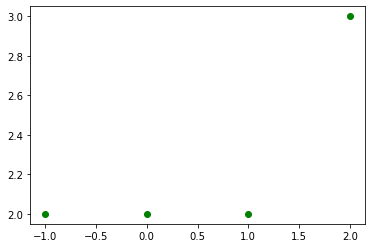

In [13]:
q = 1

def m_H(N):
    if N <= 1:
        return 2
    else:
        return 2 * m_H(N-1) - scipy.special.comb(N-1, q)
    
plt.plot(q-2, m_H(q-2), 'go')    
plt.plot(q-1, m_H(q-1), 'go')
plt.plot(q, m_H(q), 'go')    
plt.plot(q+1, m_H(q+1), 'go')

`q+1` seems to be a breakpoint (because m_H(q+1) <= 2^2), so I conclude the VC dimension is q. [c]

![](imgs/vc2.png)

We're dealing with the intersection of hypothesis sets, so the **smallest** VC dimension **of any** hypothesis set `H_k` should bound the VC dimension of the intersection.

[a] is the sum of VC dimensions, so it must be wrong.

[b] looks like a good candidate, but is there an even tighter valid bound?

[c] is the max of all VC dimensions of `H_k`, so it must be wrong.

[d] is a wrong upper bound, similar to [c]

[e] is a wrong upper bound, similar to [a]

I'll conclude the tightest valid bound here is **[b]**.

![](imgs/vc3.png)

Since we're taking the union of the hypothesis sets, the lower bound should be the max amongst all sets' VC dimensions.

This excludes [a], [b] and [c], and leaves [d] and [e] for consideration.

What can we say about the upper bound?

Not quite sure, but I don't think the bound should be higher than the sum of all VC dimensions, in fact I would intuitively say that bound is already overstated.

So my purely intuitive answer would be **[d]**.

But I'm wrong =) let's try to find out why.

There's a fun discussion on that here: http://book.caltech.edu/bookforum/showthread.php?t=4241&page=3